# The Best Classifier for Breast Cancer Prediction

The purpose of this project is to find the best classifier in machine leatning to predict the severity of the breast cancer: whether the tumor is benign or malignant. The binary classifiers that will be used in this project are: Support Vector Machine (SVM), Naive Bayes, Decision Tree, and Logistic Regression.

The data used in this project was taken from the Wisconsin Breast Cancer datasets, available at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Overall, there are 569 examples of tumor with different size of radius, texture, concavity, smoothness, and compactness available.

Let's first load the dataset and all of the necessary libraries.

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [119]:
np.random.seed(1)
trainX = pd.read_csv('trainX.csv')
trainY = pd.read_csv('trainY.csv', names = ['diagnosis'])
testX = pd.read_csv('testX.csv')
testY = pd.read_csv('testY.csv', names = ['diagnosis'])


Here the training and test data are already splitted into the proportion of 70%-30%. Each feature of the data has been normalized as well using min-max approach. Hence, the data now is ready to be used for classification study.

Let's take a look first at the size of the training data and test data.

In [120]:
print('Shape of the training set: '+str(trainX.shape))
print('Shape of the test set: '+str(testX.shape))

Shape of the training set: (398, 30)
Shape of the test set: (171, 30)


We can also see the first five rows of the training features.

In [124]:
trainX.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.607175,0.420697,0.595743,0.473595,0.412386,0.255567,0.346532,0.472068,0.263636,0.084035,...,0.689790,0.502665,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.237138,0.138463
1,0.494060,0.536016,0.488632,0.341251,0.433059,0.292068,0.394096,0.327883,0.125253,0.183235,...,0.360726,0.427772,0.348573,0.205417,0.350855,0.147481,0.223882,0.377663,0.007491,0.086187
2,0.317052,0.223876,0.303849,0.183245,0.362372,0.163088,0.041050,0.093439,0.288384,0.244103,...,0.281750,0.218017,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.244628,0.149416
3,0.273984,0.395671,0.264184,0.154358,0.314706,0.143028,0.072915,0.142346,0.320202,0.271904,...,0.207044,0.305970,0.192390,0.096908,0.149970,0.060628,0.041422,0.164021,0.121033,0.089663
4,0.333617,0.390260,0.317877,0.195080,0.343685,0.153580,0.034255,0.094235,0.230808,0.176706,...,0.263252,0.486674,0.238358,0.130333,0.379912,0.120315,0.049768,0.273643,0.130298,0.138594


And the first five rows of the training diagnosis result

In [125]:
trainY.head()

,diagnosis
0,1
1,1
2,0
3,0
4,0


As we can see above, all of the features have been normalized in advance to make sure that each of the feature carries the same weight during the classification study. 

For the diagnosis, which we want to predict, the 'benign' or 'malignant' has been transformed into factor 0 or 1 in advance. 0 represents that the tumor is benign and 1 represents that the tumor is malignant.

Now, let's define the metrics for our classification problem.

## About the Metrics

Since the classification that will be conducted is about the severity of the tumor: whether the tumor is benign ot malignant, then the accuracy metrics would not be the best metrics for this condition. The emphasize should be focused in supressing the amount of false negative in the algorithm because the cost of having miss-classified an actual positive will be huge. 

Just imagine where there is a patient that has a breast tumor and we make a decision that the tumor is benign when in fact it is malignant. This situation will endanger the patient life and thus, creating a machine learning algorithm that can supress the amount of false negative should be a priority.

Because of this, instead of accuracy or Jaccard index, the metrics that will be used for this problem is F1-score, which is the 'average' of precision and recall.

## The Best Classifier

Before we jump into the calculation of the F1-score of each classifier, let's first define the function to call each of these classifiers.

In [126]:
def TreeClassifier(xTrain, xVal, yTrain, yVal, depth):
    
    np.random.seed(1)
    F1_Tree_train = []
    F1_Tree_test = []
    
    for i in range(len(depth)):
    
        tree = DecisionTreeClassifier(criterion='entropy',max_depth=depth[i]).fit(xTrain,yTrain)
    
        yHat_Tree = tree.predict(xVal)
        yHat_train = tree.predict(xTrain)
    
        F1_Tree_train.append(metrics.f1_score(yTrain, yHat_train, average='weighted'))    
        F1_Tree_test.append(metrics.f1_score(yVal, yHat_Tree, average='weighted'))
    
    return F1_Tree_train, F1_Tree_test  

In [150]:
def SVMClassifier(xTrain, xVal, yTrain, yVal, kernel):
    
    np.random.seed(1)
    F1_SVM_train = []
    F1_SVM_test = []
    
    for i in range(len(kernel)):
        clf = svm.SVC(kernel=kernel[i])
        clf.fit(xTrain, yTrain)
    
        yHat_SVM = clf.predict(xVal)
        yHat_train = clf.predict(xTrain)
    
        F1_SVM_train.append(metrics.f1_score(yTrain, yHat_train, average='weighted'))
        F1_SVM_test.append(metrics.f1_score(yVal, yHat_SVM, average='weighted'))
    
    return F1_SVM_train,F1_SVM_test

In [169]:
def LogisticClassifier(xTrain, xVal, yTrain, yVal, C):
    
    np.random.seed(1)
    
    F1_Log_train = []
    F1_Log_test = []
    
    for i in range(len(C)):
        
        LR_model = LogisticRegression(C=C[i]).fit(xTrain,yTrain)
    
    
        yHat_Log = LR_model.predict(xVal)
        yHat_train = LR_model.predict(xTrain)
    
        F1_Log_train.append(metrics.f1_score(yTrain, yHat_train, average='weighted'))
        F1_Log_test.append(metrics.f1_score(yVal, yHat_Log, average='weighted'))
    
    return F1_Log_train, F1_Log_test

In [184]:
def NBClassifier(xTrain, xVal, yTrain, yVal):
    
    np.random.seed(1)
        
    F1_NB_train = []
    F1_NB_test = []
    
    clf = GaussianNB().fit(xTrain,yTrain)
    
    
    yHat_Log = clf.predict(xVal)
    yHat_train = clf.predict(xTrain)
    
    F1_NB_train.append(metrics.f1_score(yTrain, yHat_train, average='weighted'))
    F1_NB_test.append(metrics.f1_score(yVal, yHat_Log, average='weighted'))
    
    return F1_NB_train, F1_NB_test

So now we already define the function to calculate the F1 score for each classification algorithm. Now, let's find out the F1 score of the first classifier, which is Decision Tree.

## Decision Tree

For decision tree, it is particularly interesting to see first in advance what is the optimum depth of the tree so that it gives us the best F1 score for this particular problem. So let's do that.

In [146]:
# Try to find the best depth of decision tree
depth = np.linspace(1,10,num=10).astype(int)

f1_Tree_train, f1_Tree_test = TreeClassifier(trainX, testX, trainY, testY, depth)
f1_Tree_train[0:5]

[0.9203393310639216,
 0.9169067874748704,
 0.9625940882322993,
 0.9724996446279873,
 0.9924680390101078]

It seems like that at glance, the deeper the tree, the higher the F1-score for predicting the training data. However, we need to be careful with the problem overfitting and thus, try to find the F1-score that would work best for training data and test data. In order to do that, let's build a line plot.

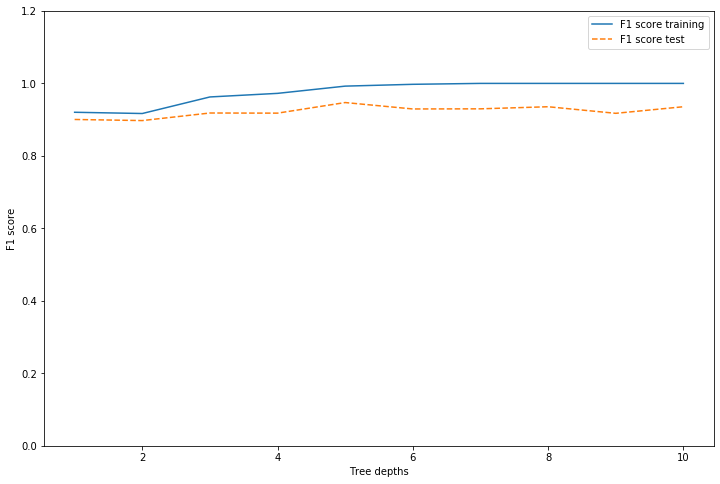

In [147]:
plt.figure(figsize=(12,8))
plt.plot(depth,f1_Tree_train,depth,f1_Tree_test, '--')
plt.xlabel('Tree depths')
plt.ylabel('F1 score')
plt.ylim(0,1.2)
plt.legend(['F1 score training','F1 score test'])

From teh graph above, it seems that the decision tree algorithm with the maximum depths allowed = 5 would produce a good training and test F1 score for this particular problem. As we can see above, the decision tree with depth above 5 will overfit the training data. So let's do this for the decision tree

In [143]:
f1_Tree_train, f1_Tree_test = TreeClassifier(trainX, testX, trainY, testY, [5])

print('F1 score for training set: '+str(f1_Tree_train[0]))
print('F1 score for test set: '+str(f1_Tree_test[0]))

F1 score for training set: 0.9924680390101078
F1 score for test set: 0.9413743525003256


As we can see above, the decision tree with the maximum allowable depth of 5 has the training F1-score of 99.24%. However, the test F1-score is just 94,3%. Let's see how another classifier perform.

## Support Vector Machines

The next classifier that will be used is Support Vector Machine (SVM). In SVM, there are several types of kernel that we can choose and it is difficult to choose which kernel would work best for this particular problem. Hence, let's find out the performance of different SVM kernel for this problem.

In [158]:
kernel = ['linear','poly','rbf','sigmoid']

f1_SVM_train, f1_SVM_test = SVMClassifier(trainX, testX, trainY, testY, kernel)

f1_SVM_train

[0.9798009983472178,
 0.5061540233546739,
 0.9593014466133992,
 0.9515228137328927]

From the first glance, it can be seen that the SVM with linear kernel perform much better than the other kernel. Now let's take a look at each kernel performance in the training and test set with simple bar chart.

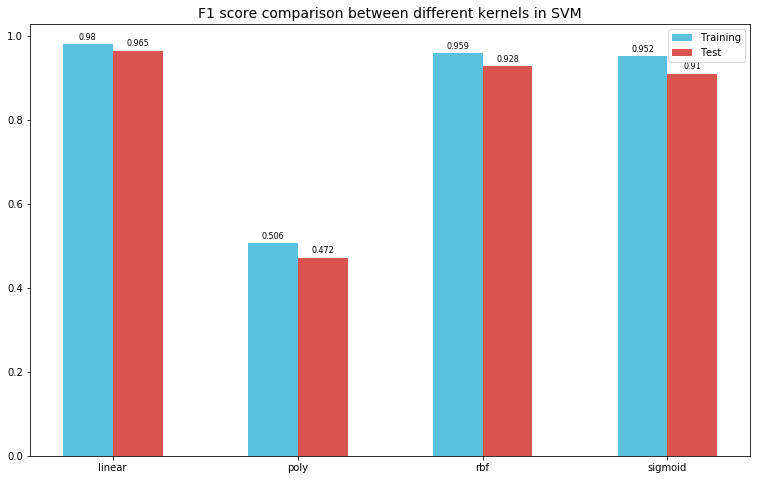

In [161]:
round_F1_train = np.around(f1_SVM_train, 3)
round_F1_test = np.around(f1_SVM_test,3)


numOfKernel = np.arange(len(kernel))
width = 0.27

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
bar1 = ax.bar(numOfKernel - 0.5*width, round_F1_train, width, label='Training', color='#5bc0de')
bar2 = ax.bar(numOfKernel + 0.5*width, round_F1_test, width, label='Test',color='#d9534f')
ax.set_title('F1 score comparison between different kernels in SVM',fontsize=14)
ax.set_xticks(numOfKernel)
ax.set_xticklabels(kernel,fontsize=10)
ax.legend(fontsize=10)

def autolabel(rects):
  
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    fontsize=8,
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

From the graphs above, it can be clearly seen that the SVM with linear kernel outperforms the other kernels for thsi problem in both training and test set. We can also see that the polynomial kernel performs poorly for this problem. Thus, let's build SVM model once more with linear kernel.

In [162]:
f1_SVM_train, f1_SVM_test = SVMClassifier(trainX, testX, trainY, testY, ['linear'])

print('F1 score for training set: '+str(f1_SVM_train[0]))
print('F1 score for test set: '+str(f1_SVM_test[0]))

F1 score for training set: 0.9798009983472178
F1 score for test set: 0.9646160856687174


The F1 score of the training set and the test set is indeed the same with what we have seen in the graph, where the F1 score for training set is 98% and test set is about 96,5%. We can also see that the SVM with linear kernel outperforms decision tree in test set, which we mostly care about.

## Logistic Regression

Next, let's see how the logistic performs in this problem. To start, let's consider that C in the logistic regression is 1, meaning thatthe regularization in the cost function is the default value.

In [172]:
f1_Log_train, f1_Log_test = LogisticClassifier(trainX, testX, trainY, testY, [1])

print('F1 score for training set: '+str(f1_Log_train[0]))
print('F1 score for test set: '+str(f1_Log_test[0]))

F1 score for training set: 0.9670282313679723
F1 score for test set: 0.9526595880121203


As we can see above, the F1 score for the training set is about  96,7% and the test set is about 95,2% by using the default regularization parameter. Considering the performance of the other solver, we suspect that the performance in the training and test set can be improved. This can be done by adjusting the regularization parameter $C$ and see which value of $C$ gives the best prediction.

Since we assume that the performance can be improved, hence we need to decrease the regularization parameter, which in sklearn library can be done by increasing the $C$ value, since $C$ value is inversely proportional to the regularization parameter.

In [176]:
C = [1,10,50,100,200,400]
f1_Log_train, f1_Log_test = LogisticClassifier(trainX, testX, trainY, testY, C)

f1_Log_train

[0.9670282313679723,
 0.9823104903551749,
 0.9873864016555153,
 0.989917576402031,
 0.989917576402031,
 0.989917576402031]

At the first glance, it can be seen that after the regularization parameter is increased beyond 100, then the F1 score prediction of the logistic regression seems to converge. Let's see what will happen with the test set in the line plot. 

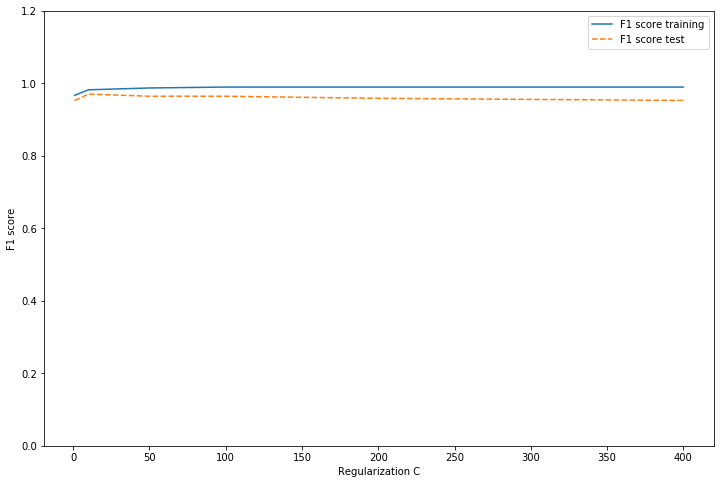

In [174]:
plt.figure(figsize=(12,8))
plt.plot(C,f1_Log_train,C,f1_Log_test, '--')
plt.xlabel('Regularization C')
plt.ylabel('F1 score')
plt.ylim(0,1.2)
plt.legend(['F1 score training','F1 score test'])

From the graph above, we can see that by applying regularization parameter $C$ = 10, then we get the best prediction for both training set and test set. Applying regularization parameter beyond 10 might be increasing the F1 score for the training set but the test set F1-score will gradually decreased.

In [177]:
f1_Log_train, f1_Log_test = LogisticClassifier(trainX, testX, trainY, testY, [10])

print('F1 score for training set: '+str(f1_Log_train[0]))
print('F1 score for test set: '+str(f1_Log_test[0]))

F1 score for training set: 0.9823104903551749
F1 score for test set: 0.9705603722224222


Finally, for logistic regression we have F1 score in the training set about 98.2% and F1-score for the test set = 97%

## Naive Bayes

The last classifier that will be investigated is naive-bayes classifier. In this project, the naive Boyes model that will be used is Gaussian Naive Bayes, since not all of the features are boolean or discrete data. Hence, let's jump to the calculation to find out the performance of Gaussian naive bayes.

In [186]:
f1_NB_train, f1_NB_test = NBClassifier(trainX, testX, trainY, testY)

print('F1 score for training set: '+str(f1_NB_train[0]))
print('F1 score for test set: '+str(f1_NB_test[0]))

F1 score for training set: 0.9471952408038752
F1 score for test set: 0.9350208849427213


As we can see above, the training F1 score prediction by using Naive Bayes is about 94.7%, while the test F1 score is about 93.5%

## Summary

four classifications machine learning algorithm in order to predict the severity of tumor: whether the tumor is benign or malignant, has been conducted. Below is the summary result of F1 score of different classifiers on training and test sets.

| Algorithm          | Training | Test      |
|--------------------|----------|-----------|
| Decision tree      | 0.992    | 0.941     |
| SVM                | 0.980    | 0.965     | 
| Logistic Regression| 0.982    | 0.970     |
| Naive-Bayes        | 0.947    | 0.935     | 

From the table summary above, we can see that the decision tree fit the training test better, but suffers from overfitting which cause the test F1-score to be much lower than the training set. Meanwhile, logistic regression with the modification of regularization parameter performs better than the other classifier applied in this project.
